## Data
This dataset is a CSV file created using the spotify API and my own account with a playlist of songs I created to compare.

This dataset contains 6 total albums (3 from STARSET and 3 from Kid Cudi) and data on every song from those albums.

This analysis will compare the popularity score of the songs to their tempo and "speechiness" score and from there I can draw my conclusions on if there are correlations between faster songs and popularity and how it differs between the genres.

## Overview
I plan on using a bar graph for each artists' song data to compare the tempo VS popularity VS speechiness. I may overlay these bar graphs and analyze any similarities that stand out. In this way I can compare the genres to see how popularity of songs differ based on tempo. 

I also might use a T test to analyze the difference in the average popularity of the genres and overall speechiness of the songs, and draw conclusions from there as well.

I first had to import pandas for my dataframe and any other data analysis tools I might work with.

In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

I then had to read in the spotify dataset that I would be working with, checking the keys to make sure that the data I wanted was there.

In [2]:
dataset = pd.read_csv(r'C:\Users\jchil\Desktop\spotifydata.csv')
dataset.keys()

Index(['Unnamed: 0', 'name', 'album', 'artist', 'release_date', 'length',
       'popularity', 'danceability', 'acousticness', 'danceability.1',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'tempo', 'time_signature'],
      dtype='object')

I then wanted to pull out Kid Cudi's data alone (and STARSET's, individually)

In [3]:
cudi_data = dataset.loc[dataset['artist']=='Kid Cudi']
starset_data = dataset.loc[dataset['artist']=='STARSET']

Now I can plot the datasets that I wanted to look at andbegin my analysis fully, because my data was separated by artist/genre. 

I wanted to look by album to see popularity trends, so i created yet another dataset that filtered by album.

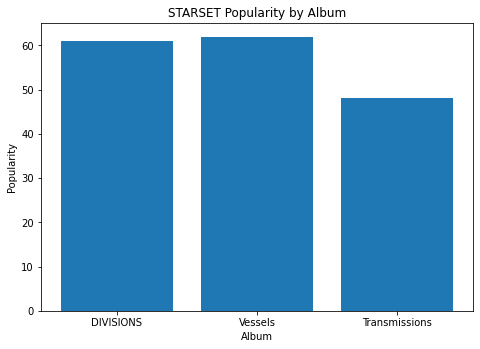

In [4]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
albums = starset_data['album']
popularity = starset_data['popularity']
ax.bar(albums, popularity)
ax.set_ylabel('Popularity')
ax.set_xlabel('Album')
ax.set_title('STARSET Popularity by Album')
plt.show()

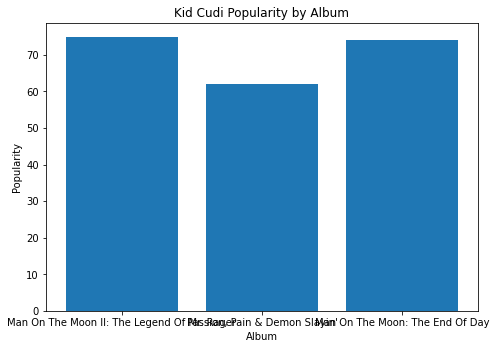

In [5]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
albums = cudi_data['album']
popularity = cudi_data['popularity']
ax.bar(albums, popularity)
ax.set_ylabel('Popularity')
ax.set_xlabel('Album')
ax.set_title('Kid Cudi Popularity by Album')
plt.show()

From these plots I can see that overall the Rap genre here is represented as more popular overall, with Kid Cudi's least popular album only dipping to about 60, where STARSET's data peaks.

From here, I wanted to move on to comparing the songs' tempo to their speechiness to see if there was correlating data, but to show it nicer I wanted to sort the tempos in descending order

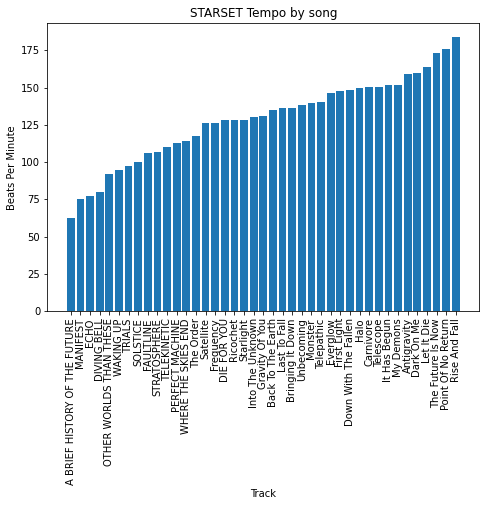

In [29]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
tempo = starset_data['tempo'].sort_values()
track = starset_data['name']
ax.bar(track, tempo)
ax.set_xlabel('Track')
ax.set_ylabel('Beats Per Minute')
ax.set_title('STARSET Tempo by song')
plt.xticks(rotation = 90)
plt.show()

From this I can see that STARSET's songs vary wildly in tempo, now I wanted to see how Kid Cudi's songs compare

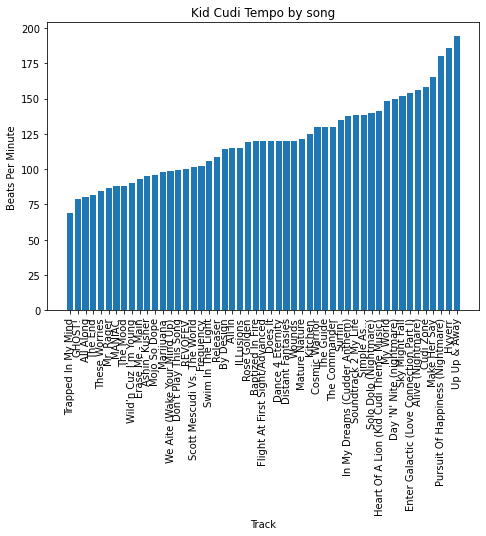

In [30]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
tempo = cudi_data['tempo'].sort_values()
track = cudi_data['name']
ax.bar(track, tempo)
ax.set_xlabel('Track')
ax.set_ylabel('Beats Per Minute')
ax.set_title('Kid Cudi Tempo by song')
plt.xticks(rotation = 90)
plt.show()

From these charts I can see that the Kid Cudi has a higher top end BPM than STARSET, but STARSET's slowest song is slower than Cudi's.

Now I wanted to get into the meat of my analysis. I wanted to start by making a histogram of the Tempo and popularity data from both artists. (Speechiness has too low of data points to show up on a graph)

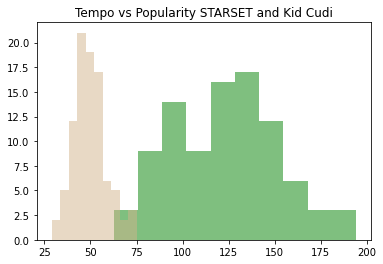

In [10]:
x = dataset['tempo']
y = dataset['speechiness']
z = dataset['popularity']
plt.hist(x, color='green', label='green = tempo', alpha = 0.5)
plt.hist(z, color='tan', label='tan = popularity', alpha = 0.5)
plt.title('Tempo vs Popularity STARSET and Kid Cudi')
plt.show()

From this plot I can see that as tempo increases, so does popularity in many cases.

I then wanted to compare the speechiness scores of the songs from either artist to look for correlation.

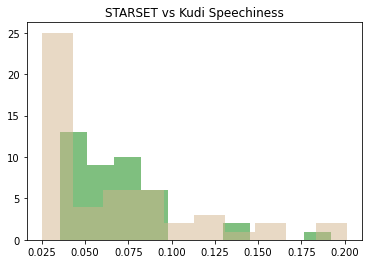

In [11]:
a = starset_data['speechiness']
c = cudi_data['speechiness']
plt.hist(a, color='green', alpha = 0.5)
plt.hist(c, color='tan', alpha = 0.5)
plt.title('STARSET vs Kudi Speechiness')
plt.show()

From this plot I could tell that Overall, Kid Cudi's songs are less speechy with one or two songs in particular being far "speechier" according to spotify's data.

This allows me to draw the conclusion that despite what most may think, Metal (in this case) is more "speechy" than Rap.

I then wanted to overlay the BPM/Tempo of either artist to draw my conclusions there.

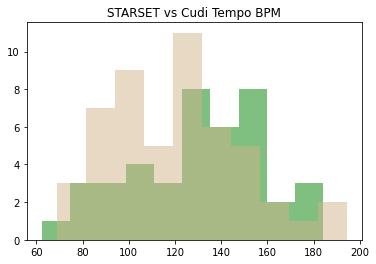

In [12]:
a = starset_data['tempo']
c = cudi_data['tempo']
plt.hist(a, color='green', alpha=0.5)
plt.hist(c, color='tan', alpha=0.5)
plt.title('STARSET vs Cudi Tempo BPM')
plt.show()

From this I can see that overall, Kid Cudi's songs have a higher maximum BPM but STARSET's have a higher average BPM, meaning that overall the average BPM between the genres is actually pretty close.

From these overlaid histograms, I can tell that the majority of the time when a single song is a high tempo, it is also most likely popular, as the lower tempo songs seem to have lower popularity scores. 

Looking directly at the CSV file with my data, I can see that STARSET's slowest song, The Order, has the lowest popularity score in the entire dataset. This might indicate a correlation between slower songs and lower popularity.

I now wanted to complete my analysis with an analysis of the differences of the genres popularity scores by overlaying them, and then overalaying that with the tempo histogram, to draw my final conclusions.

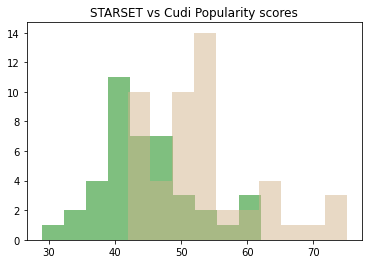

In [13]:
a = starset_data['popularity']
c = cudi_data['popularity']
plt.hist(a, color='green', alpha=0.5)
plt.hist(c, color='tan', alpha=0.5)
plt.title('STARSET vs Cudi Popularity scores')
plt.show()

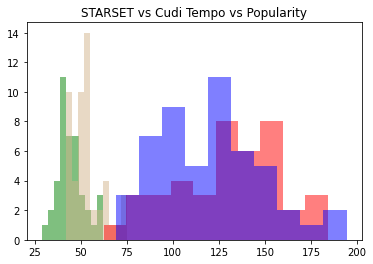

In [14]:
a = starset_data['popularity']
c = cudi_data['popularity']
plt.hist(a, color='green', alpha=0.5)
plt.hist(c, color='tan', alpha=0.5)
b = starset_data['tempo']
d = cudi_data['tempo']
plt.hist(b, color='red', alpha=0.5)
plt.hist(d, color='blue', alpha=0.5)
plt.title('STARSET vs Cudi Tempo vs Popularity')
plt.show()

## Analysis
My analysis revealed that according to spotify's data, Kid Cudi is overall more popular than STARSET. What makes the Rap genre more popular isn't the Tempo, which was close between the genres, nor is it the Speechiness, which wasn't wildly larger in one genre versus the other, but rather must be another factor.

## Conclusions, Limitations, Alternative Approaches, & Next Steps
As I analyzed the data, I discovered that the two artists' datasets were far closer in tempo and speechiness than I had originally assumed. Rap is known for its higher tempo and overall "speechiness", and more words are spoken in a rap song than a rock song on average was my assumption.

From this I can state that my hypothesis that there are correlations between faster songs and popularity was correct.

One surprising fact coming out of this is that Metal/Rock is actually on average only slightly less "speechy" as Rap, with STARSET's average "speechiness" scores coming out only slightly lower than Kid Cudi's.

In the future, I could love to have been able to compare more of the data from the Spotify API between more artists and genres to find out just what makes one genre more popular than another. I would be able to compare the other scores that Spotify gives songs, such as danceability or energy to see if there is a correlation between popularity and those scores. 